<h1 style="color:red"> Table of Content </h1> 

1. [Packages Loding](#1)
2. [Parameters](#2)
3. [Data Extraction](#4)
   1. [Function that scrapes the list of dates](#3.1)
   2. [Scrape data for a specific date](#3.2)
   3. [Scraping Crypto data for multiple dates ](#3.3)
4. [Data Transformation](#4)
    1. [Create a DataFrame](#4.1)
    2. [Cleaning and Formatting Data](#4.2)
    3. [Call function for to transform data](#4.3)
    4. [Checking The missing Values ](#4.4)
    5. [Standarization](#4.5)
5. [Load data: Save data in csv format](#6)
6. [Read Data](#6)
7. [Times series analysis](#7)
8. [Correlation Analysis](#8)

<h1 style="color:red"> 1. Load necessary Packages</h1> 

In [3]:
import os
from colored import fg 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np
from bs4 import BeautifulSoup as bs
import requests
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
import matplotlib.dates as mdates

<h1 style="color:red"> 2. Parameters</h1> 

In [166]:
BASE_URL = 'https://coinmarketcap.com/historical/'
# Path to save data
PATH_TO_SAVE_RESULT = "/home/thierno/python/webScraping"
CODE_STATUS = 200

<h1 style="color:red"> 3. Data Extraction </h1>

<h2 style="color:green" > 3.1 Function that scrapes the list of dates </h2>

In [168]:
scrape_date_list = []
base_url = 'https://coinmarketcap.com/historical/'
def scrape_list_of_date(url, code_status): 
    response = requests.get(url)
    if response.status_code != code_status:
        print("The server did not respond successfully")
        print(response.status_code)  
    # The server successfully answered the http request
     ## Create a BeautifulSoup object
    soup = bs(response.text, "html.parser")

    # get the urls 
    a_tags_href = soup.find_all("a", class_ = "historical-link cmc-link")
    # check if the list is empty 
    if not a_tags_href: 
        return scrape_date_list
    ## a_tags_href is not empty
    for tag in a_tags_href: 
        href = tag.get("href")
        ## add the href in the list
        scrape_date_list.append(href)
    
    return scrape_date_list

## Call function  and scrape a list of date
scrape_date_list = scrape_list_of_date(url=BASE_URL, code_status=CODE_STATUS)
## color th texte 
color = fg("red")
print(color + "The are "+ str(len(scrape_date_list)) + " dates (Sundays) currently available ")

The are 598 dates (Sundays) currently available 


<h2 style="color:green" > 3.2 Scrape data for a specific date  </h2>

In [170]:
# Create a list to keep the result
crypto_date_list = []
crypto_name_list = []
crypto_symbol_list = []
crypto_market_cap_list = []
crypto_price_list = []
crypto_circulating_supply_list = []
crypto_pct_1hr_td_list = []
crypto_pct_24hr_td_list = []
crypto_pct_7day_td_list = []

list_all_values =  []

In [172]:
def scrape_data_for_specific_date(date, code_status): 
    url = 'https://coinmarketcap.com' + date
    response = requests.get(url)
    if response.status_code !=code_status :
        print("The server did not respond successfully")
        print(response.status_code)  
    # The server successfully answered the http request
     ## Create a BeautifulSoup object
    soup = bs(response.text, "html.parser")
    tr = soup.find_all('tr', attrs={'class': 'cmc-table-row'})
    count = 0
    for row in tr: 
        if count ==10:
            break 
        count +=1
        try: 
            crypto_date = date
            name_column = row.find("td", attrs = {"class" :"cmc-table__cell cmc-table__cell--sticky cmc-table__cell--sortable cmc-table__cell--left cmc-table__cell--sort-by__name"})
            crypto_name = name_column.find("a",
                                           attrs = {"class" :"cmc-table__column-name--name cmc-link"}).text.strip()
            crypto_symbol = row.find("td", 
                                     class_ = "cmc-table__cell cmc-table__cell--sortable cmc-table__cell--left cmc-table__cell--sort-by__symbol")
            crypto_symbol = crypto_symbol.text.strip()
            cry_market_cap = row.find("td", 
                                  class_ ="cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__market-cap")
            cry_market_cap = cry_market_cap.text.strip()
            crypto_price = row.find("td", 
                                   class_ = "cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__price")
            crypto_price = crypto_price.text.strip()

            crypto_circulating_supply = row.find("td", 
                                                class_ ="cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__circulating-supply")
            
            crypto_circulating_supply = crypto_circulating_supply.text.strip().split(' ')[0]
            
            crypto_pct_1hr_td = row.find("td", 
                                             class_ = "cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__percent-change-1-h")
            
            crypto_pct_1hr_td = crypto_pct_1hr_td.text.strip()
            crypto_pct_24hr_td = row.find("td",
                              class_ = "cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__percent-change-24-h")

            crypto_pct_24hr_td = crypto_pct_24hr_td.text.strip()
            crypto_pct_7day_td = row.find("td", 
                                      class_ = "cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__percent-change-7-d")

            crypto_pct_7day_td = crypto_pct_7day_td.text.strip()
        except AttributeError: 
            crypto_date = None
            crypto_name = None
            crypto_symbol = None
            cry_market_cap = None
            crypto_price = None
            crypto_circulating_supply = None
            crypto_pct_1hr_td = None
            crypto_pct_24hr_td = None            
            crypto_pct_7day_td = None

        
        ## Add the values in the differents lists
        
        crypto_date_list.append(crypto_date)
        crypto_name_list.append(crypto_name)
        crypto_symbol_list.append(crypto_symbol)
        crypto_market_cap_list.append(cry_market_cap)
        crypto_price_list.append(crypto_price)
        crypto_circulating_supply_list.append(crypto_circulating_supply)
        crypto_pct_1hr_td_list.append(crypto_pct_1hr_td)
        crypto_pct_24hr_td_list.append(crypto_pct_24hr_td)
        crypto_pct_7day_td_list.append(crypto_pct_7day_td)
    

<h2 style="color:green" > 3.3 Scraping Crypto data for multiple dates  </h2>

In [177]:
format_date = "%Y%m%d"
# Split and convert the start date and end date 
start_date = datetime.strptime(scrape_date_list[0].split("/")[-2], format_date).strftime("%Y-%m-%d")
end_date = datetime.strptime(scrape_date_list[-1].split("/")[-2], format_date).strftime("%Y-%m-%d")
## Show the result
print("There are "+ str(len(scrape_date_list)) + " dates(Sunday) between " + start_date + " and "+ end_date)

## Create a values
color = fg("red")
for element in range (len(scrape_date_list)): 
    scrape_data_for_specific_date(scrape_date_list[element], code_status=CODE_STATUS)
    print(color + " Scraping completed : " + str(element+1) + " Output on " + str(len(scrape_date_list)))

There are 598 dates(Sunday) between 2013-04-28 and 2024-10-06
 Scraping completed : 1 Output on 598
 Scraping completed : 2 Output on 598
 Scraping completed : 3 Output on 598
 Scraping completed : 4 Output on 598
 Scraping completed : 5 Output on 598
 Scraping completed : 6 Output on 598
 Scraping completed : 7 Output on 598
 Scraping completed : 8 Output on 598
 Scraping completed : 9 Output on 598
 Scraping completed : 10 Output on 598
 Scraping completed : 11 Output on 598
 Scraping completed : 12 Output on 598
 Scraping completed : 13 Output on 598
 Scraping completed : 14 Output on 598
 Scraping completed : 15 Output on 598
 Scraping completed : 16 Output on 598
 Scraping completed : 17 Output on 598
 Scraping completed : 18 Output on 598
 Scraping completed : 19 Output on 598
 Scraping completed : 20 Output on 598
 Scraping completed : 21 Output on 598
 Scraping completed : 22 Output on 598
 Scraping completed : 23 Output on 598
 Scraping completed : 24 Output on 598
 Scraping c

<h1 style="color:red" > 4 Data Transformation </h1>

<h2 style="color:green" > 4.1 Create a Dataframe </h2>

In [179]:
data = pd.DataFrame({"Date" : crypto_date_list,
                        "Name" : crypto_name_list,
                        "Symbol" : crypto_symbol_list, 
                        "Market Cap" : crypto_market_cap_list,
                        "Price" : crypto_price_list,
                        "Circulating Supply" : crypto_circulating_supply_list,
                        "% 1h": crypto_pct_1hr_td_list,
                        "% 24h": crypto_pct_24hr_td_list,
                        "% 7d" : crypto_pct_7day_td_list

    
})

data.head(10)

,Date,Name,Symbol,Market Cap,Price,Circulating Supply,% 1h,% 24h,% 7d
0,/historical/20130428/,Bitcoin,BTC,"$1,488,566,971.96",$134.21,"11,091,325",0.64%,--,--
1,/historical/20130428/,Litecoin,LTC,"$74,637,021.57",$4.3484,"17,164,230",0.80%,--,--
2,/historical/20130428/,Peercoin,PPC,"$7,250,186.65",$0.3865,"18,757,362",-0.93%,--,--
3,/historical/20130428/,Namecoin,NMC,"$5,995,997.19",$1.1072,"5,415,300",-0.05%,--,--
4,/historical/20130428/,Terracoin,TRC,"$1,503,099.40",$0.6469,"2,323,570",0.61%,--,--
5,/historical/20130428/,Devcoin,DVC,"$1,424,087.30",$0.0003261,"4,366,620,160",0.46%,--,--
6,/historical/20130428/,Novacoin,NVC,"$1,162,266.30",$4.2464,"273,706",2.14%,--,--
7,/historical/20130505/,Bitcoin,BTC,"$1,288,693,216.22",$115.91,"11,118,050",0.43%,2.97%,-13.81%
8,/historical/20130505/,Litecoin,LTC,"$62,298,217.32",$3.5909,"17,348,954",0.10%,2.87%,-16.72%
9,/historical/20130505/,Namecoin,NMC,"$6,290,543.05",$1.1510,"5,465,350",-1.19%,8.91%,1.64%


In [202]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5967 entries, 0 to 5966
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                5967 non-null   datetime64[ns]
 1   Name                5967 non-null   object        
 2   Symbol              5967 non-null   object        
 3   Market Cap          5967 non-null   float64       
 4   Price               5967 non-null   float64       
 5   Circulating Supply  5967 non-null   int64         
 6   % 1h                5967 non-null   float64       
 7   % 24h               5967 non-null   float64       
 8   % 7d                5967 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(2)
memory usage: 419.7+ KB


In [175]:
data.head()

,Date,Name,Symbol,Market Cap,Price,Circulating Supply,% 1h,% 24h,% 7d
0,2013-04-28,Bitcoin,BTC,0.001061,0.001881,1.835706e-08,0.624097,0.0,0.009526
1,2013-04-28,Litecoin,LTC,0.000053,0.000061,2.866253e-08,0.627708,0.0,0.009526
2,2013-04-28,Peercoin,PPC,0.000005,0.000005,3.136601e-08,0.588673,0.0,0.009526
3,2013-04-28,Namecoin,NMC,0.000004,0.000016,8.725074e-09,0.608529,0.0,0.009526
4,2013-04-28,Terracoin,TRC,0.000001,0.000009,3.478535e-09,0.623421,0.0,0.009526


<h2 style="color:green" > 4.2 Cleaning and Formatting Data </h2>

In [206]:
## Function for to transform data
def data_transformation (data):
    # Extract the date and transform to date type 
    data["Date"] = pd.to_datetime(data["Date"].str.split("/").str[-2], format ="%Y%m%d")
    # Replace the dollar signs($) and commas(,) from Market Cap and 'Price' Columns
    data['Market Cap'] = data['Market Cap'].str.replace("[,$]", '', regex = True)
    data["Price"]  = data["Price"].str.replace("[$,]", "", regex = True)
    # Replace the commas (r,) from Circulating supply column
    data["Circulating Supply"]  = data["Circulating Supply"].str.replace(",", "")
    ## Replace the unchange sign (--), the smaller sign (<), the larger sign (>)
    # and percentage sign (%) from the '% 1h', '% 24h', and '% 7d' columns
    data["% 1h"] = data["% 1h"].str.replace("--", "0").str.lstrip(">").str.lstrip('<').str.rstrip('%')
    data['% 24h'] = data['% 24h'].str.replace('--', '0').str.lstrip('>').str.lstrip('<').str.rstrip('%')
    data['% 7d'] = data['% 7d'].str.replace('--', '0').str.lstrip('>').str.lstrip('<').str.rstrip('%')
    ## Convert the numerical columns 
    numeric_columns = ["Market Cap", "Price", "Circulating Supply", "% 1h", "% 24h", "% 7d"]
    data[numeric_columns] = data[numeric_columns].apply(lambda x : pd.to_numeric(x))
    return data

<h2 style="color:green" > 4.3 Call function for to transform data</h2>

In [196]:
dataset = data_transformation(data)

In [210]:
dataset.head()

,Date,Name,Symbol,Market Cap,Price,Circulating Supply,% 1h,% 24h,% 7d
0,2013-04-28,Bitcoin,BTC,1.488567e+09,134.2100,11091325,0.64,0.0,0.0
1,2013-04-28,Litecoin,LTC,7.463702e+07,4.3484,17164230,0.80,0.0,0.0
2,2013-04-28,Peercoin,PPC,7.250187e+06,0.3865,18757362,-0.93,0.0,0.0
3,2013-04-28,Namecoin,NMC,5.995997e+06,1.1072,5415300,-0.05,0.0,0.0
4,2013-04-28,Terracoin,TRC,1.503099e+06,0.6469,2323570,0.61,0.0,0.0


<h2 style="color:green" > 4.3 Check The missing Values </h2>

In [252]:
display(dataset.isnull().sum())

Date                  0
Name                  0
Symbol                0
Market Cap            0
Price                 0
Circulating Supply    0
% 1h                  0
% 24h                 0
% 7d                  0
dtype: int64

<h2 style="color:green" > 4.5 Standarization </h2>

In [244]:
## Define function for data standarization 
def standarization_data(data, numeric_cols): 
    # Normalization 
    scaler = MinMaxScaler()
    data_normalized = data.copy() ## copy of original data
    data_normalized[numeric_cols] = scaler.fit_transform(data[numeric_cols])
    ## return the normalized data 
    return data_normalized        

In [248]:
numeric_cols = ['Market Cap', 'Price', 'Circulating Supply', '% 1h','% 7d']
data_normalized = standarization_data(data = data, numeric_cols=numeric_cols)

In [250]:
data_normalized.head()

,Date,Name,Symbol,Market Cap,Price,Circulating Supply,% 1h,% 24h,% 7d
0,2013-04-28,Bitcoin,BTC,0.001061,0.001881,1.835706e-08,0.624097,0.0,0.009526
1,2013-04-28,Litecoin,LTC,0.000053,0.000061,2.866253e-08,0.627708,0.0,0.009526
2,2013-04-28,Peercoin,PPC,0.000005,0.000005,3.136601e-08,0.588673,0.0,0.009526
3,2013-04-28,Namecoin,NMC,0.000004,0.000016,8.725074e-09,0.608529,0.0,0.009526
4,2013-04-28,Terracoin,TRC,0.000001,0.000009,3.478535e-09,0.623421,0.0,0.009526


<h1 style="color:red" > 5 Load data: Save data </h1>

In [282]:
def save_dataset(data,path, name_of_file): 
    if  os.path.exists(path): 
        print("The path is exist")
        data.to_csv(os.path.join(path,name_of_file)) 
    else: 
        print("The path is not exits")
## Call function 
save_dataset( data = data_normalized,
            path= PATH_TO_SAVE_RESULT,
             name_of_file= "crypto_dataset.csv")

The path is exist


<h1 style="color:red" > 6 Read Data </h1>

In [181]:
data = pd.read_csv(os.path.join(PATH_TO_SAVE_RESULT, "crypto_dataset.csv"), index_col=0)
data.head()

,Date,Name,Symbol,Market Cap,Price,Circulating Supply,% 1h,% 24h,% 7d
0,2013-04-28,Bitcoin,BTC,0.001061,0.001881,1.835706e-08,0.624097,0.0,0.009526
1,2013-04-28,Litecoin,LTC,0.000053,0.000061,2.866253e-08,0.627708,0.0,0.009526
2,2013-04-28,Peercoin,PPC,0.000005,0.000005,3.136601e-08,0.588673,0.0,0.009526
3,2013-04-28,Namecoin,NMC,0.000004,0.000016,8.725074e-09,0.608529,0.0,0.009526
4,2013-04-28,Terracoin,TRC,0.000001,0.000009,3.478535e-09,0.623421,0.0,0.009526


<h1 style="color:red" > 7 Time Series Analysis</h1>

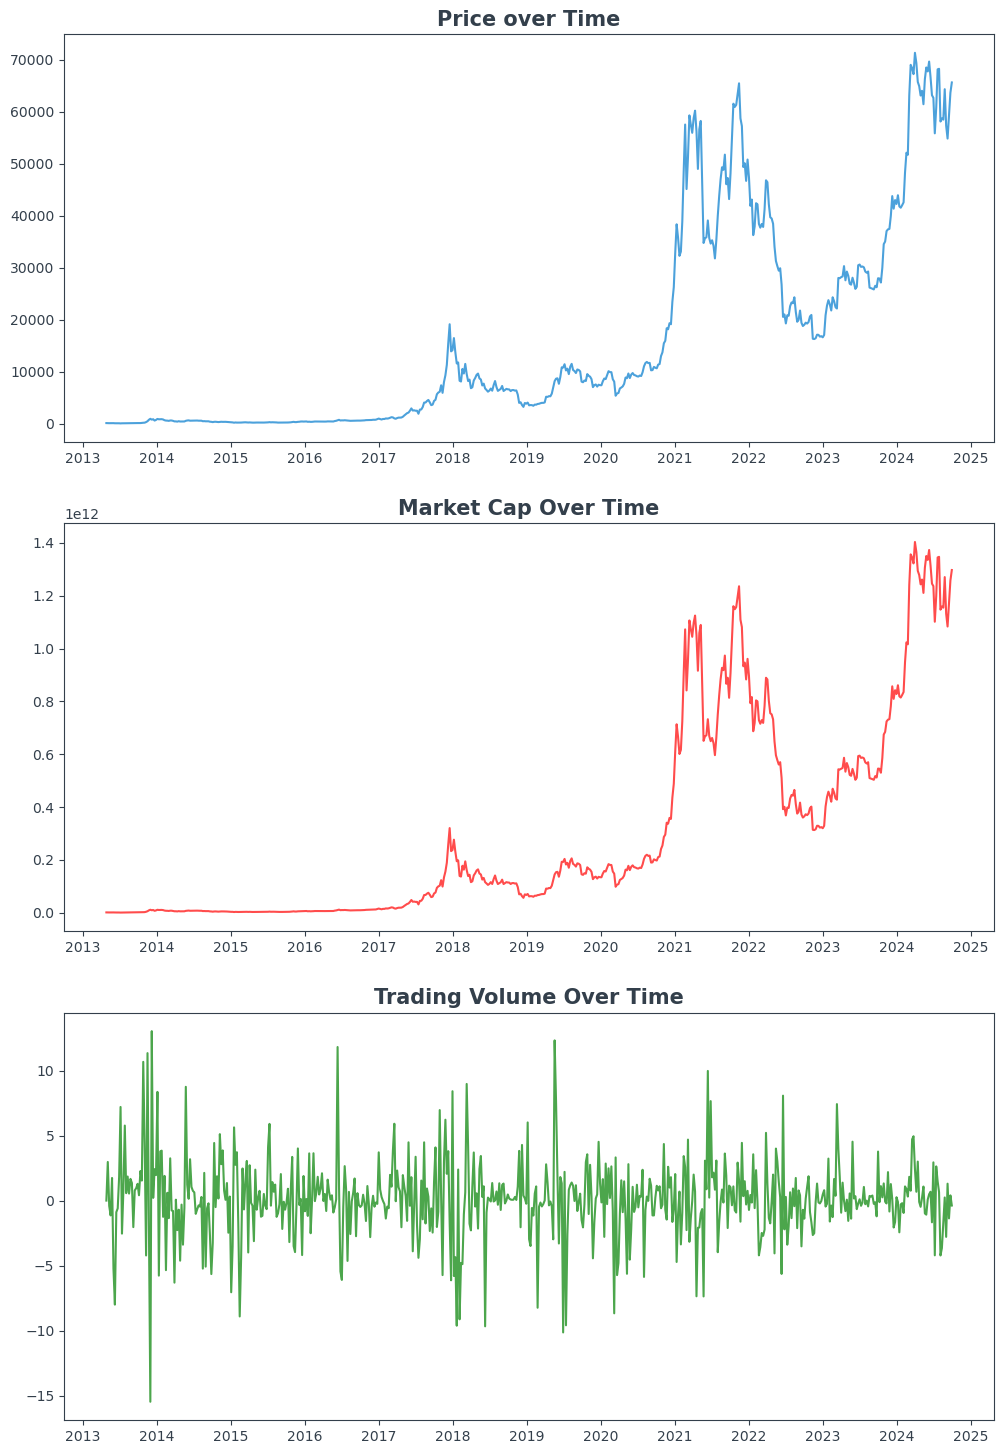

In [277]:
data["Date"] = pd.to_datetime(data["Date"])
## Filter data 
bcr_data = data[data["Symbol"] == "BTC"]

## Set the style of the axes and the text color 
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['text.color']='#333F4B'

## create  subplots 
fig, axes = plt.subplots(3,1,figsize = (12,18))
## Plot 'price' over time 
axes[0].plot(bcr_data["Date"], bcr_data["Price"], color = "#007acc", alpha = 0.7)
axes[0].set_title("Price over Time", fontsize = 15,fontweight = "black", color ="#333F4B" )
## Plot Market Cap over Time 
axes[1].plot(bcr_data["Date"], bcr_data["Market Cap"], color ="red", alpha = 0.7 )

axes[1].set_title('Market Cap Over Time', fontsize=15, fontweight='black', color = '#333F4B')

# Plot 'Volume (24hr)' over time
axes[2].plot(bcr_data['Date'], bcr_data['Volume (24hr)'], color='green', alpha=0.7)
axes[2].set_title('Trading Volume Over Time', fontsize=15, fontweight='black', color = '#333F4B')
## Formatting dates 
data_format = mdates.DateFormatter('%Y')
for ax in axes: 
    ax.xaxis.set_major_formatter(data_format)
    ax.xaxis.set_major_locator(mdates.YearLocator())

plt.show()

In [134]:
data["Symbol"].unique()

array(['BTC', 'LTC', 'PPC', 'NMC', 'TRC', 'DVC', 'NVC', 'FTC', 'FRC',
       'MNC', 'CNC', 'DGC', 'YAC', 'XPM', 'XRP', 'IFC', 'CBX', 'WDC',
       'PTS', 'QRK', 'MEC', 'NXT', 'OMNI', 'DOGE', 'XCP', 'AUR', 'SPA',
       'APH', 'BLK', 'DASH', 'START', 'BCN', 'XC', 'MAID', 'BTS', 'XPY',
       'XLM', 'NSR', 'XMR', 'BANX', 'ETH', 'TRMB', 'FCT', 'EMC', 'AMP',
       'XEM', 'DGD', 'STEEM', 'DAO', 'LSK', 'ETC', 'REP', 'WAVES', 'PIVX',
       'GNT', 'STRAT', 'MIOTA', 'EOS', 'USDT', 'BCH', 'NEO', 'BCC', 'BTG',
       'ADA', 'TRX', 'BSV', 'BNB', 'XTZ', 'STO', 'TAGZ5', 'CRO', 'LINK',
       'DOT', 'UNI', 'THETA', 'ICP', 'USDC', 'BUSD', 'SOL', 'SHIB',
       'LUNA', 'AVAX', 'UST', 'MATIC', 'TON'], dtype=object)

In [136]:
data["Symbol"].value_counts()

Symbol
BTC      597
XRP      583
ETH      478
LTC      420
USDT     327
        ... 
XC         1
PIVX       1
STO        1
TAGZ5      1
THETA      1
Name: count, Length: 85, dtype: int64

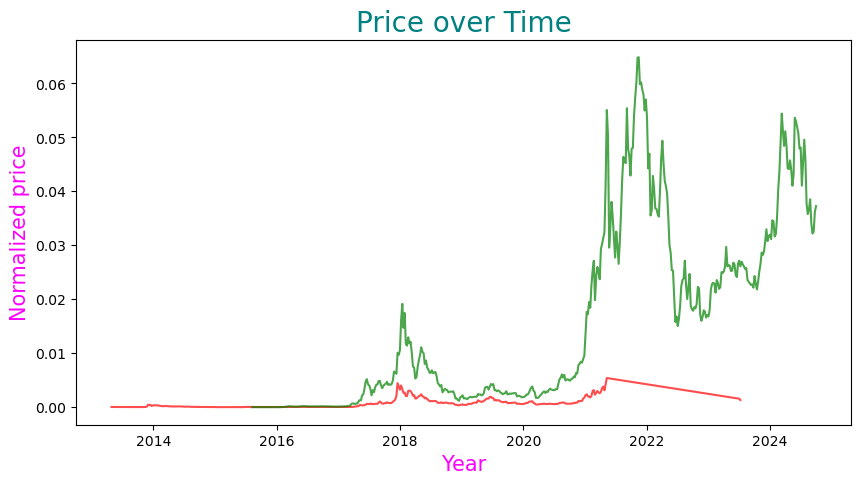

In [223]:
## create  subplots 
fig, axes = plt.subplots(figsize = (10,5))
## Plot 'price' over time 
data["Date"] = pd.to_datetime(data["Date"])
ltc_data = data[data["Symbol"] == "LTC"]
eth_data = data [data["Symbol"] =="ETH"]
plt.plot(ltc_data["Date"], ltc_data["Price"], color = "red", alpha = 0.7)
plt.plot(eth_data["Date"], eth_data["Price"], color = "green", alpha = 0.7)
plt.title("Price over Time", fontsize = 20, color ="#008080" )
plt.xlabel("Year", color = "Fuchsia", size = 15)
plt.ylabel("Normalized price", color = "Fuchsia", size = 15)
plt.show()

<h1 style="color:red" >8. Correlation Analysis</h1>

<Axes: >

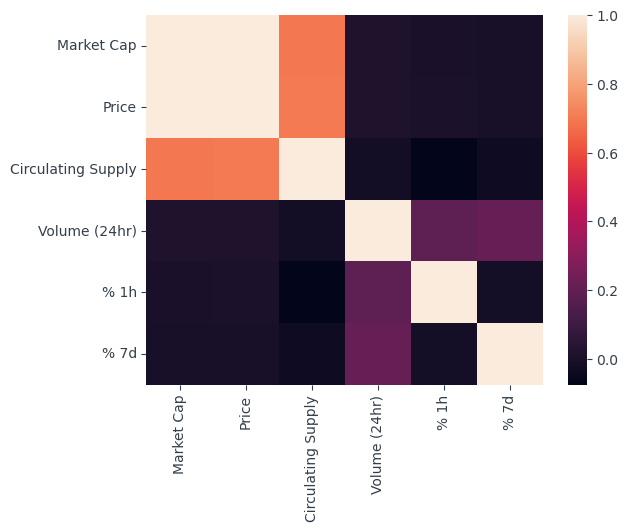

In [288]:
# Compunte the correlation matrix 
correlation_matrix = data[['Market Cap', 'Price', 'Circulating Supply', 'Volume (24hr)', '% 1h', '% 7d']].corr()
sns.heatmap(correlation_matrix)